In [11]:
import pandas as pd
import quandl, math
import numpy as np
from sklearn import preprocessing, svm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
#calling quandl api and extracting data
data = quandl.get('WIKI/GOOGL')
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


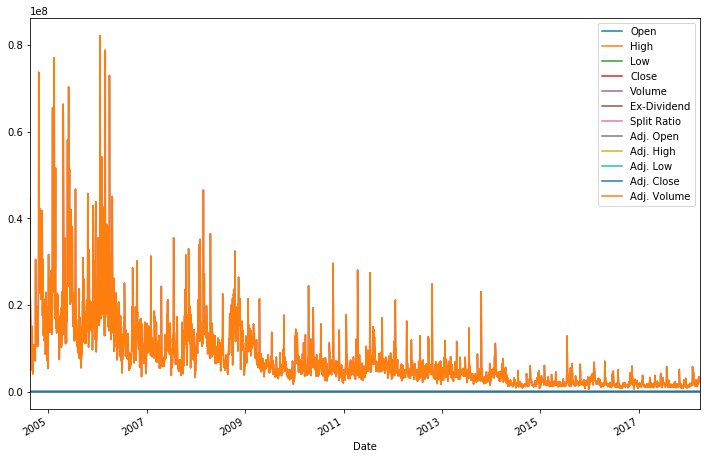

In [13]:
#ploting the data
data.plot(figsize=(12,8))

In [4]:
#taking the important columns
#making new columns
data = data[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
#high and low change
data['HL_PCT'] = (data['Adj. High']-data['Adj. Close'])/data['Adj. Close']*100.0
#daily pct change
data['PCT_change'] = (data['Adj. Close']-data['Adj. Open'])/data['Adj. Open']*100.0

In [5]:
data.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,3.712563,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,0.710922,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,3.729433,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,6.417469,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,1.886792,1.183658


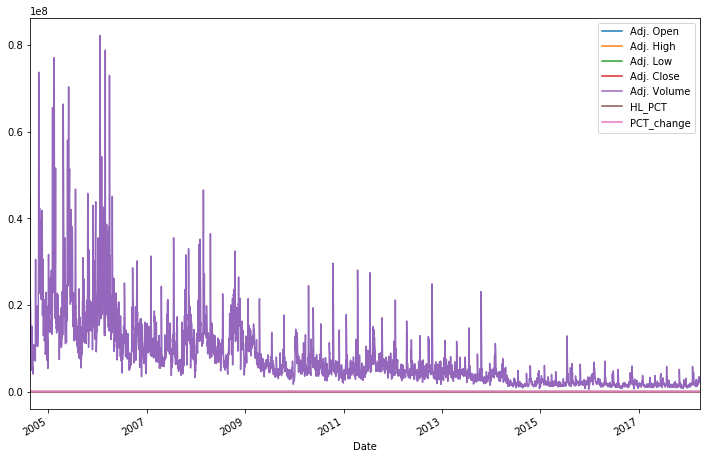

In [6]:
data.plot(figsize=(12,8))

In [7]:
#making new dataframe
data = data[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
data.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


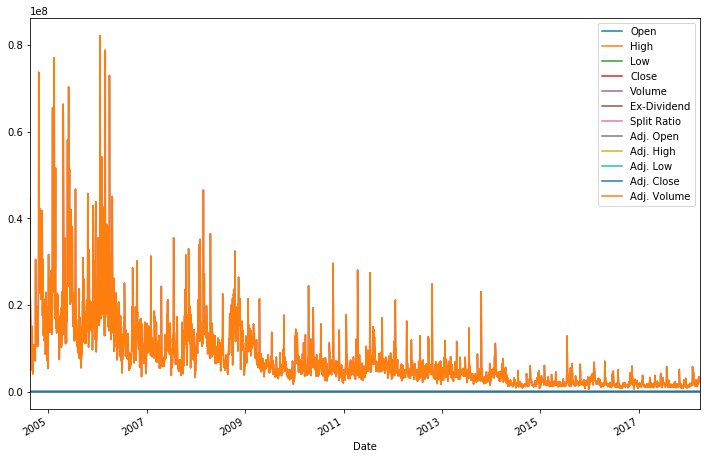

In [14]:
#ploting the new dataframe
data.plot(figsize=(12,8))

In [17]:
forecast_col = 'Adj. Close'
data.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.01*len(data)))
data['label'] = data[forecast_col].shift(-forecast_out)
data.dropna(inplace=True)
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,label
Date,,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0,69.078238
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0,67.839414
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0,68.912727
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0,70.668146
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0,71.219849


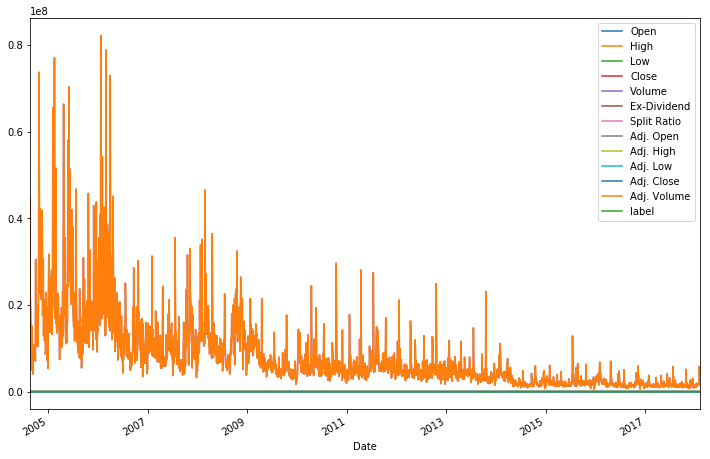

In [18]:
data.plot(figsize=(12,8))

In [19]:
X = np.array(data.drop(['label'],1))
y = np.array(data['label'])
X = preprocessing.scale(X)
y = np.array(data['label'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2)
clf  = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

In [20]:
print("Accuracy:",accuracy)

('Accuracy:', 0.9793282196606113)
